In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [55]:
df=pd.read_csv('IRIS.csv')

In [56]:
df.shape

(150, 6)

In [57]:
df.isnull().sum()

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [58]:
df.dtypes

Id                int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [59]:
data=df.groupby('species')

In [60]:
data.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [61]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8c3f2ba70>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8c3f29070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8c3f2b710>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8c3f2b470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8c3f2bd10>],
 'means': []}

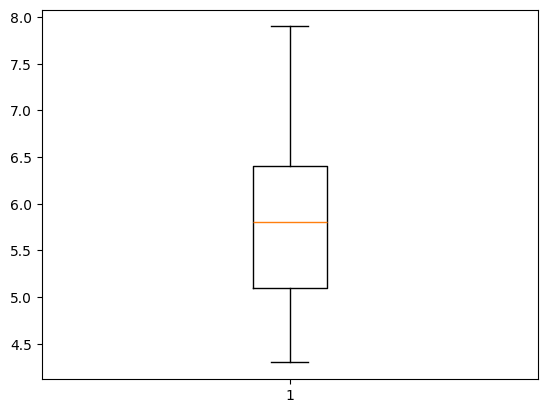

In [63]:
plt.boxplot(df['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8c3f37290>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8c3f37ce0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8c3f37710>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8c3f383e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8c3f38680>],
 'means': []}

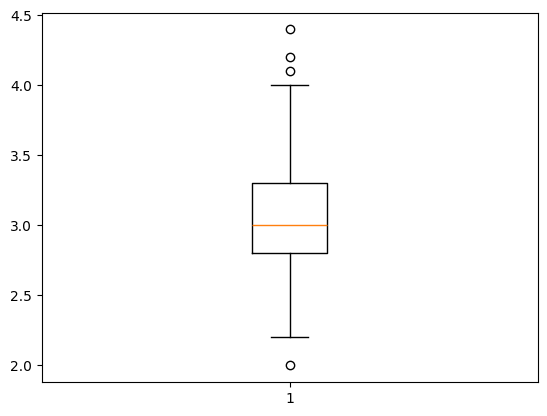

In [64]:
plt.boxplot(df['sepal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8c3f42360>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8c3f42810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8c3f421e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8c3f42de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8c3f430e0>],
 'means': []}

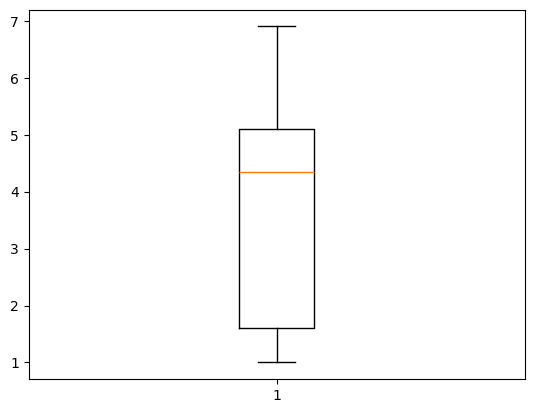

In [65]:
plt.boxplot(df['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8c4050c80>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8c40511f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8c4050a70>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8c40516d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8c40519d0>],
 'means': []}

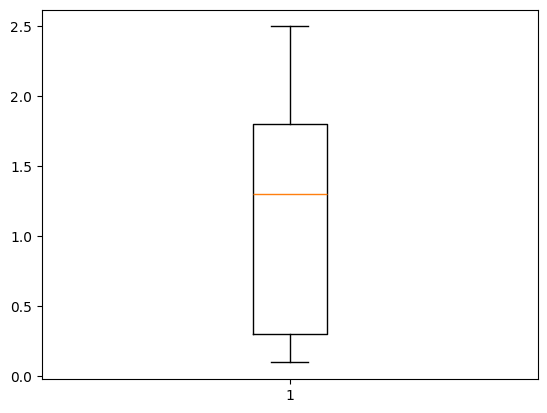

In [66]:
plt.boxplot(df['petal_width'])

<Axes: >

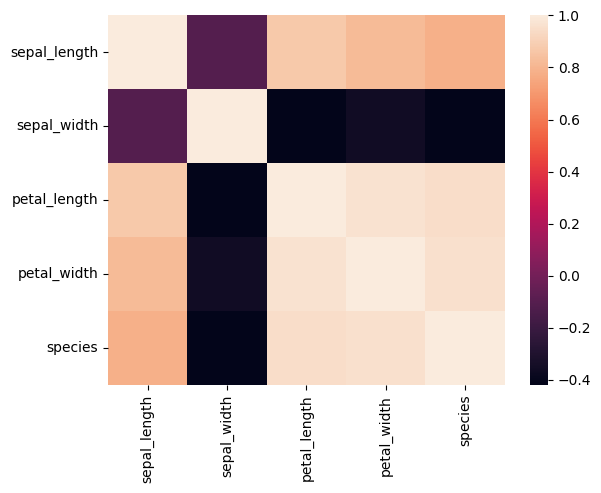

In [68]:
sns.heatmap(df.corr())

In [67]:

df.drop('Id', axis=1, inplace=True)
sp = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df['species']=[sp[i] for i in df.species]
print(df)



     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]


In [71]:
X=df.iloc[:,0:4]
print(X)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [72]:
Y=df.iloc[:,4]
Y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=4)
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [75]:
model.score(X,Y)

0.9304223675331595

In [76]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [77]:
model.intercept_

1.192083994828139

In [78]:
Y_pred=model.predict(X_test)

In [79]:
print("Mean square error: %2f" %np.mean((Y_pred - Y_test)**2))

Mean square error: 0.043121
